## K means clustering

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")

## Generate Random data


(600, 2)
[[ 0.43386325  0.51401655]
 [-0.58717619  0.68210609]
 [ 0.01890161  2.02815654]
 ...
 [ 6.92742938  1.76203464]
 [ 6.87597268  0.48937571]
 [ 8.09483101  1.06108633]]


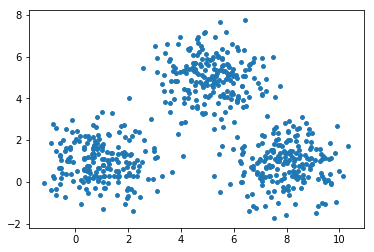

In [2]:
# Set three centers, the model should predict si,ilsr results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

# Generate random date center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200, 2) + center_2
data_3 = np.random.randn(200, 2) + center_3

data = np.concatenate((data_1, data_2, data_3),axis =0)
print(data.shape)
print (data)
plt.scatter(data[:,0], data[:,1], s=15)

## Create K-Means Algorithum

In [3]:
data.shape

(600, 2)

In [4]:
# Number of clusters
k=3
# Number of training data
n = data.shape[0]
# Number of feature in the data
c = data.shape[1]

[4.68967869 2.29206575]
[[0.83785985 0.89623846]
 [9.57524399 0.61322956]
 [5.63787323 2.86911533]]


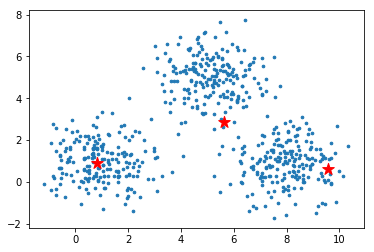

In [5]:
# Generate random centers, here we use sigma(standard deviation) and mean to ensure it represent the whole data
# print (data)
mean = np.mean(data, axis=0)
print(mean)
std= np.std(data,axis = 0)
centers = np.random.randn(k,c)*std + mean
print(centers)

# plot the data and the centers generated as random
plt.scatter(data[:,0],data[:,1], s=7)

plt.scatter(centers[:,0], centers[:,1],marker="*" , c='r',s=150)

In [6]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # store new centers

print(data.shape)
clusters = np.zeros(n)
# print(clusters)
distance = np.zeros((n,k))
#np.linalg => normalize the matrix and vector

error = np.linalg.norm(centers_new - centers_old)
print(error)

# When, after an update, the estimate of that center stays the same, exit loop

while error !=0:
    #measure the distance to every center
    for i in range (k):
        distance[:,i] = np.linalg.norm(data-centers[i], axis=1)
        #assign all training data to losest center
        clusters = np.argmin(distance, axis = 1)
        #print(clusters)
        
        centers_old = deepcopy(centers_new)
        # Claculating mean for every cluster and update the center
        for i in range (k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)

print("UPdated centers :", centers_new)

(600, 2)
11.557856108061277
UPdated centers : [[0.95519881 0.97260625]
 [8.30418188 0.72006208]
 [5.44485279 4.33522772]]


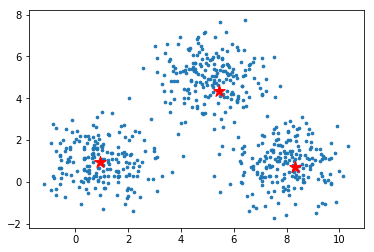

In [7]:
# plot the data and the centers generated as random
plt.scatter(data[:,0],data[:,1], s=7)

plt.scatter(centers_new[:,0], centers_new[:,1],marker="*" , c='r',s=150)

## test on iris Dataset

In [8]:
pd.set_option('display.max_rows', 150) # to read complete data
df = pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
df = df.rename(columns={"species": "Species"})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
# change categorical data to number 0-2
df["Species"] = pd.Categorical(df["Species"])
#print(df)
df['Species'] =df["Species"].cat.codes
# change dataframe to numpy matrix
data = df.values[:, 0:4]
print(data)
category = df.values[:,4]
print(category)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [11]:
# number of clusters
k = 3

# Number of training data
n = data.shape[0]
print(n)
c= data.shape[1]
print(c)


# generate random centers, here we use sigma and ensure and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std= np.std(data,axis = 0)
centers= np.random.randn(k,c)*std + mean

150
4


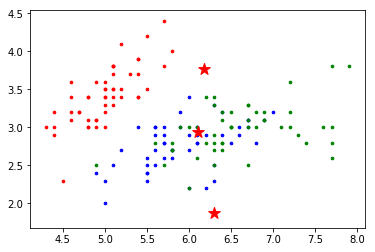

In [12]:
# Plot the data and the centers generated as random
colors=['red', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i,0], data[i,1], s=7, color =colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker = '*', c='r', s =150)


In [13]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # store new centers

print(data.shape)
clusters = np.zeros(n)
# print(clusters)
distance = np.zeros((n,k))
#np.linalg => normalize the matrix and vector

error = np.linalg.norm(centers_new - centers_old)
print(error)

# When, after an update, the estimate of that center stays the same, exit loop

while error !=0:
    #measure the distance to every center
    for i in range (k):
        distance[:,i] = np.linalg.norm(data-centers[i], axis=1)
        #assign all training data to losest center
        clusters = np.argmin(distance, axis = 1)
        #print(clusters)
        
        centers_old = deepcopy(centers_new)
        # Claculating mean for every cluster and update the center
        for i in range (k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)

print("UPdated centers :", centers_new)

(150, 4)
13.963694637178069
UPdated centers : [[5.37142857 2.32857143 3.58571429 1.01428571]
 [5.00784314 3.40980392 1.49215686 0.2627451 ]
 [6.3423913  2.9173913  5.02717391 1.7326087 ]]


# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i,0], data[i,1], s=7, color =colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker = '*', c='r', s =150)


 ## K means cluster using scikit lenrn

In [14]:
from sklearn.cluster import KMeans

In [15]:
#Create an instance of a means model with 2 cluster.

In [16]:
km = KMeans(n_clusters = 2, random_state=90)

In [17]:
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## fit the model to all the data expect for the private label.

In [18]:
km.fit(df.drop('Private', axis=1))

KeyError: "labels ['Private'] not contained in axis"